In [27]:
import sys
import cv2
sys.path.append('..')

In [4]:
%matplotlib inline

import math as m
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from core import Core

from global_var import COLORS


In [5]:
matplotlib.rc('font', family='serif') 
matplotlib.rc('font', serif='Palatino Linotype') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 20})

In [25]:
folder = r'C:\SPRUP_data_Jenda\2019_03_13_Jenda_microscopy\20_12_11_BC5/'.replace('\\', '/')

file = 'raw_02_'


core = Core(folder, file+str(1))
core.downsample(5)
core.type = 'diff'
print(len(core))

99


In [23]:
# dir(core)

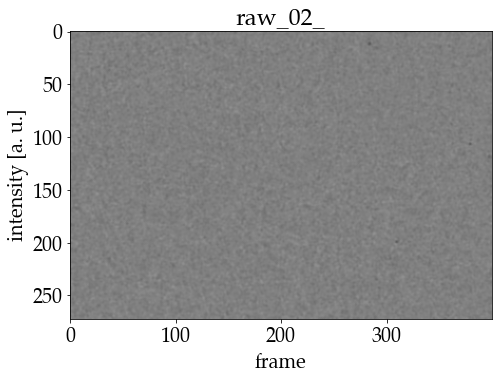

In [57]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])
axes.set_title(file)
axes.set_xlabel('frame')
axes.set_ylabel('intensity [a. u.]')

img = cv2.bilateralFilter(np.float32(core.frame(50)), 
                          5, 
                          1e-2, 
                          1)

axes.imshow(
    img,
    cmap='gray',
    zorder=0,
    vmin=core.range[0],
    vmax=core.range[1]
)
    


# fig.savefig('images/intensity_fluctiations_SLED.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')    
